# What have we here, now?
<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

- This project aims to develop a decision tree that will predict digits in images, using the digits dataset.
- This is a dataset of 8x8 grayscale images of handwritten digits (0–9) and their corresponding labels.
- Each image is represented as a flattened 64-dimensional feature vector.

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

### Now, let's import the necessary libraries and load the dataset.

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [4]:
digits = load_digits()

In [5]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

- The dataset contains 1,797 images of handwritten digits.
- Each image is converted into a flattened vector of 64 pixel values.

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

### Now, let's view a sample of the dataset.

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

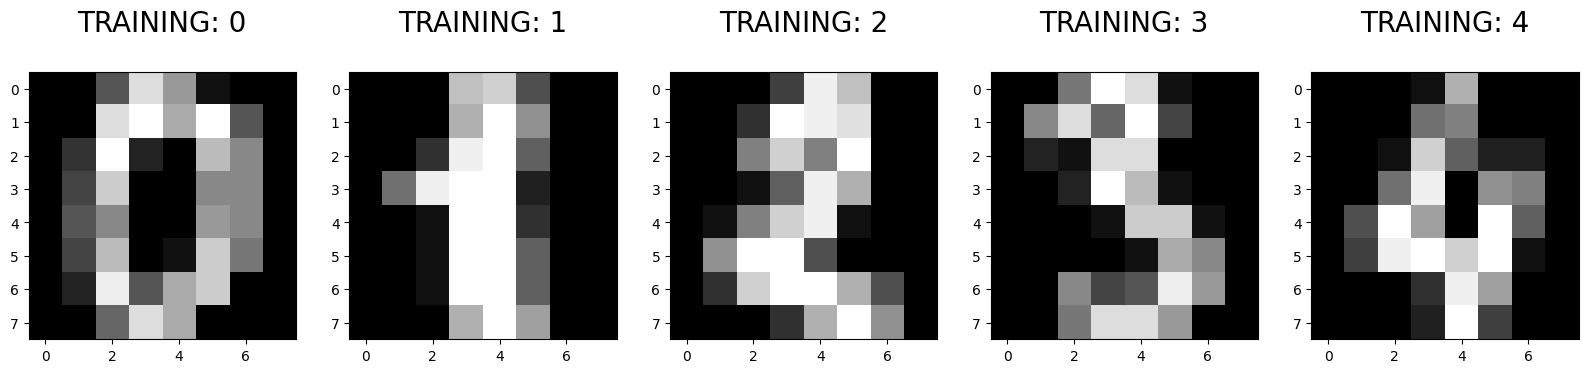

In [6]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('TRAINING: %i\n' %label, fontsize = 20)

### Let's start building our algorithm.

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

- Let's split the data using a 70:30 ratio.
- 70% for training the algorithm and 30% for testing the algorithm.

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

In [7]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.30, random_state=2)

In [8]:
print(x_train.shape)

(1257, 64)


In [9]:
print(y_train.shape)

(1257,)


In [10]:
print(x_test.shape)

(540, 64)


In [11]:
print(y_test.shape)

(540,)


<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

- The training set contains 1257 samples.
- The testing set contains 540 samples.

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

### Now, let's train our decision tree using the training set.

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

In [12]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
decision_tree = DecisionTreeClassifier(max_depth=3000, random_state=42)
decision_tree.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3000, random_state=42)

### Now, let's do some predictions using the testing set.

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

- Let's start by predicting the digit in the first test sample.

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

In [14]:
print(decision_tree.predict(x_test_scaled[0].reshape(1,-1)))

[1]


<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

- The algorithm predicts that the digit in the first test sample is 1.
- Let's confirm this prediction by visualizing it.

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

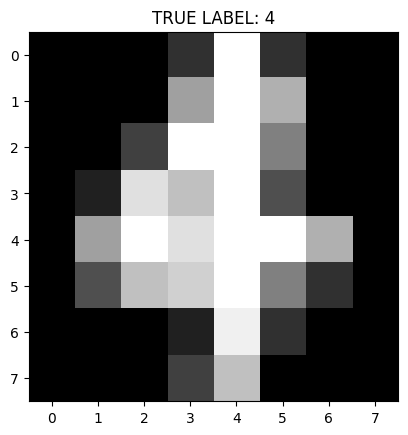

In [15]:
plt.imshow(x_test[0].reshape(8, 8), cmap=plt.cm.gray)
plt.title('TRUE LABEL: %i' % y_test[0])
plt.show()

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

- Oops! that does not look good. The prediction is incorrect. But, let's see what happens when we increase the number of samples.

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

### Let's test the algorithm on the first 100 samples.

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

In [16]:
decision_tree.predict(x_test_scaled[0:100])

array([1, 0, 9, 1, 7, 7, 9, 5, 1, 6, 6, 7, 6, 1, 5, 5, 8, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 0, 6, 8, 1, 5, 7,
       9, 8, 9, 6, 1, 3, 0, 1, 9, 7, 3, 3, 1, 3, 8, 8, 9, 8, 5, 9, 9, 8,
       2, 5, 3, 4, 3, 9, 3, 8, 7, 3, 3, 0, 8, 7, 2, 3, 5, 2, 8, 7, 6, 4,
       6, 2, 2, 0, 4, 4, 5, 3, 5, 7, 7, 8])

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

- We have our predictions from the algorithm, but what do these numbers truly indicate?
- These represent the predicted digits for the first few samples. However, how accurate are these predictions, and how well does the algorithm perform across different samples?
- These are important questions that require further analysis to answer!



<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

### Now, let's try to answer these questions!

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

- But, first let's make some predictions on the whole testing set.

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

In [17]:
predictions = decision_tree.predict(x_test_scaled)

### Let’s perform a more in-depth analysis of the algorithm’s performance by examining the classification report.

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

In [18]:
report = classification_report(y_test, predictions, target_names=[str(i) for i in range(10)])
print(report)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.74      0.66      0.70        56
           2       0.88      0.85      0.87        54
           3       0.91      0.81      0.85        62
           4       0.91      0.79      0.85        53
           5       0.94      0.86      0.90        59
           6       0.92      0.96      0.94        56
           7       0.88      0.91      0.89        55
           8       0.63      0.77      0.69        47
           9       0.65      0.84      0.73        44

    accuracy                           0.84       540
   macro avg       0.84      0.84      0.84       540
weighted avg       0.85      0.84      0.84       540



<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

- The algorithm achieved an accuracy score of 0.84 on the testing set. This means that approximately 84% of the test samples were classified correctly.
- The algorithm had its best performance predicting digit 0, with an f1-score of 0.95, and had its lowest performance predicting digit 8, with an f1-score of 0.69.

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">


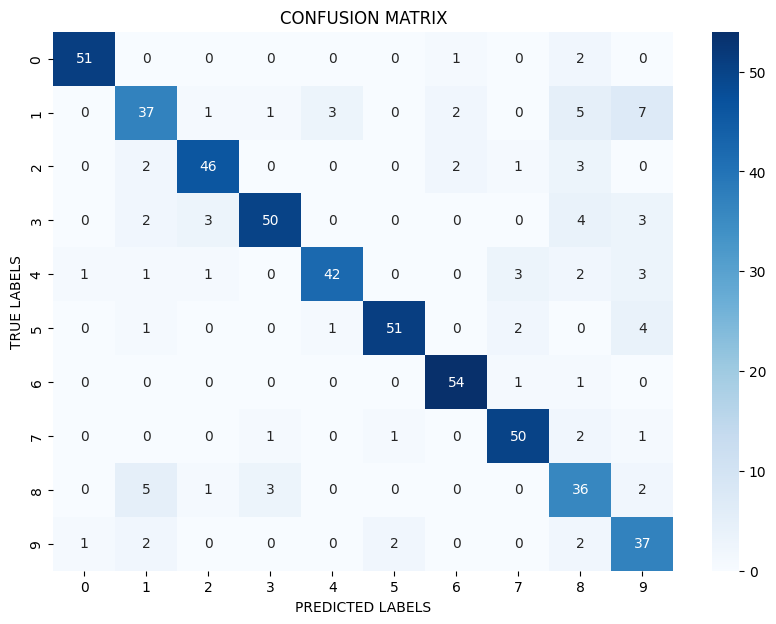

In [19]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel('PREDICTED LABELS')
plt.ylabel('TRUE LABELS')
plt.title('CONFUSION MATRIX')
plt.show()

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">

- The algorithm performs well overall but struggles with certain digits, particularly 8 and 1, which might be due to overlapping features or noise in the dataset.
- Some digits like 0 are easier for the algorithm to classify, indicating distinct features for this class.

<hr style = "border: none; height: 4px; background-color: rebeccapurple;">